# Routing (electrical)

You can use the same optical routing functions to route metal

2022-03-03 06:44:35.120 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 4.3.0


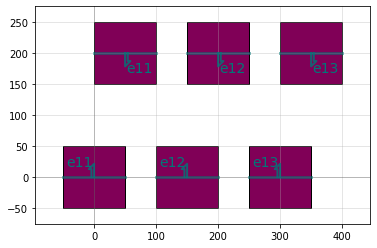

In [1]:
import gdsfactory as gf

c = gf.Component("pads")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((50, 200))
c.plot()

## Single route functions

### get_route_electrical


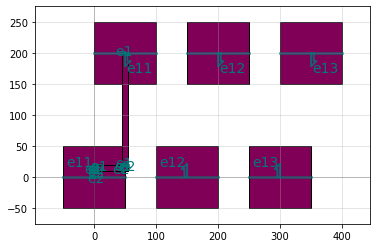

In [2]:
route = gf.routing.get_route_electrical(pt.ports["e11"], pb.ports["e11"])
c.add(route.references)
c.plot()

### route_quad

In [3]:
c = gf.Component("pads_routed_quad")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))
route = gf.routing.route_quad(pt.ports["e11"], pb.ports["e11"], layer=(49, 0))
c.add(route)

## get_route_from_steps

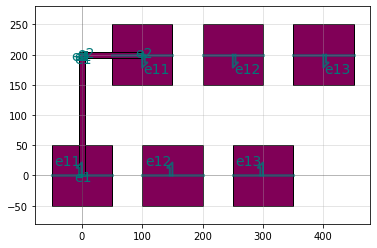

In [4]:
c = gf.Component("pads_route_from_steps")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))
route = gf.routing.get_route_from_steps(
    pb.ports["e11"],
    pt.ports["e11"],
    steps=[
        {"y": 200},
    ],
    cross_section=gf.cross_section.metal3,
    bend=gf.components.wire_corner,
)
c.add(route.references)
c.plot()

## Bundle of routes (get_bundle_electrical)

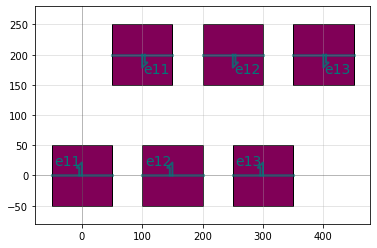

In [5]:
import gdsfactory as gf

c = gf.Component("pads_bundle")
pt = c << gf.components.pad_array(orientation=270, columns=3)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((100, 200))
c.plot()

## get bundle from steps

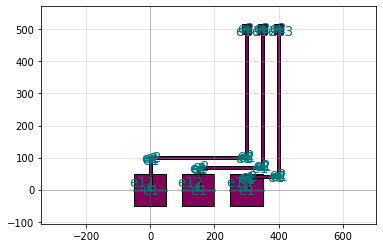

In [6]:
c = gf.Component("pads_bundle_steps")
pt = c << gf.components.pad_array(
    gf.partial(gf.components.pad, size=(30, 30)), orientation=270, columns=3, spacing=(50, 0)
)
pb = c << gf.components.pad_array(orientation=90, columns=3)
pt.move((300, 500))

routes = gf.routing.get_bundle_from_steps_electrical(
    pb.ports, pt.ports, end_straight_length=60, separation=30, steps=[{"dy": 100}]
)

for route in routes:
    c.add(route.references)

c.plot()